In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df = pd.read_csv('train.csv')

In [2]:
df.head(),df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


(   id keyword location                                               text  \
 0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
 1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
 2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
 3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
 4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   
 
    target  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  ,
 None,
                  id      target
 count   7613.000000  7613.00000
 mean    5441.934848     0.42966
 std     3137.116090     0.49506
 min        1.000000     0.00000
 25%     2734.000000     0.00000
 50%     5408.000000     0.00000
 75%     8146.000000     1.00000
 max    10873.000000     1.00000)

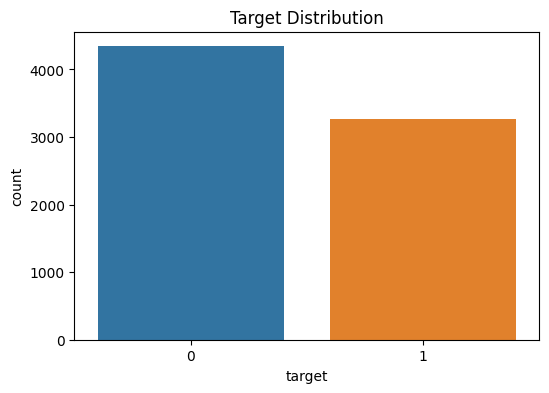

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target')
plt.title('Distribución de los datos')
plt.show()

In [13]:
df = df.applymap(lambda x: x.replace("%20", " ") if isinstance(x, str) else x)

In [14]:
top_keywords = df['keyword'].value_counts().head(20)
top_keywords

fatalities    45
deluge        42
armageddon    42
sinking       41
damage        41
harm          41
body bags     41
outbreak      40
evacuate      40
fear          40
collided      40
siren         40
twister       40
windstorm     40
sinkhole      39
sunk          39
hellfire      39
weapon        39
weapons       39
famine        39
Name: keyword, dtype: int64

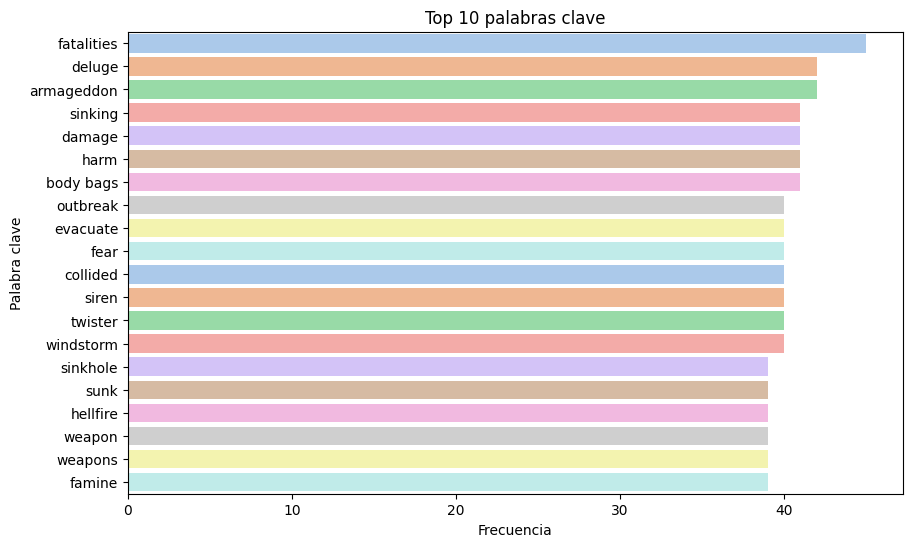

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_keywords.index, x=top_keywords.values, palette='pastel')
plt.title('Top 10 palabras clave')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra clave')
plt.show()

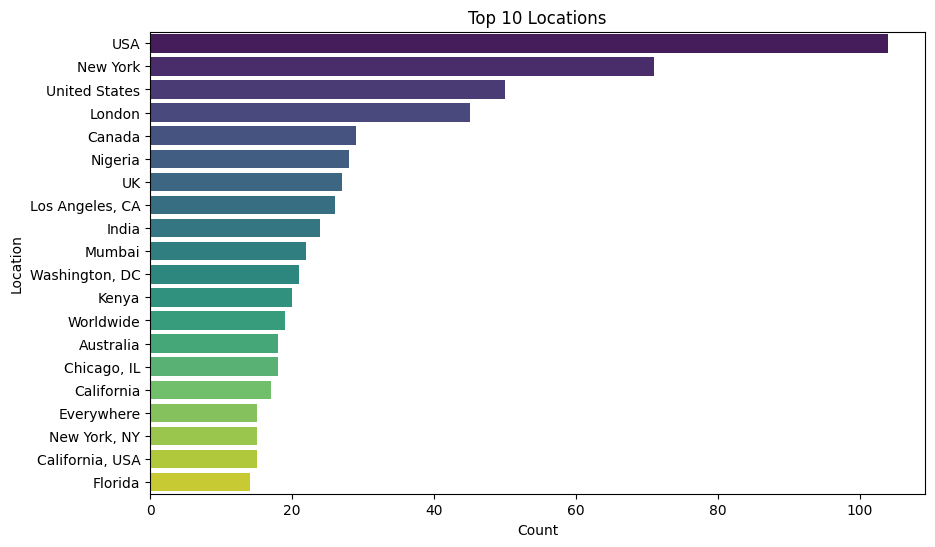

In [17]:
top_locations = df['location'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_locations.index, x=top_locations.values, palette='viridis')
plt.title('Top 10 Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

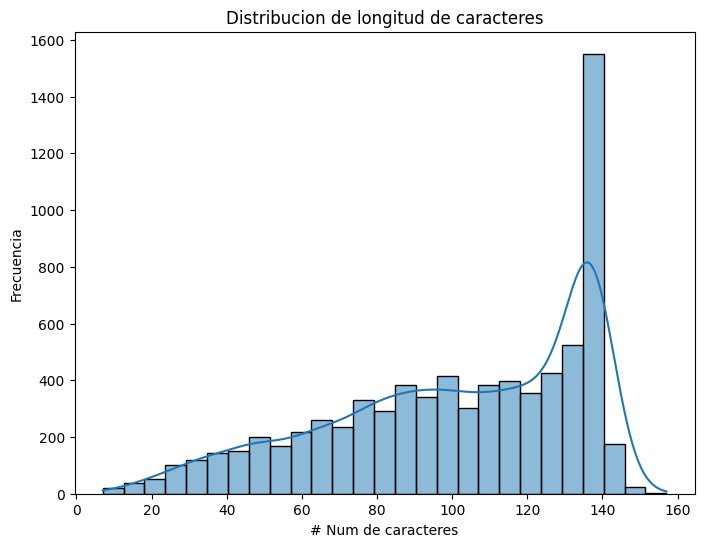

In [20]:
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='text_length', kde=True)
plt.title('Distribucion de longitud de caracteres')
plt.xlabel('# Num de caracteres')
plt.ylabel('Frecuencia')
plt.show()

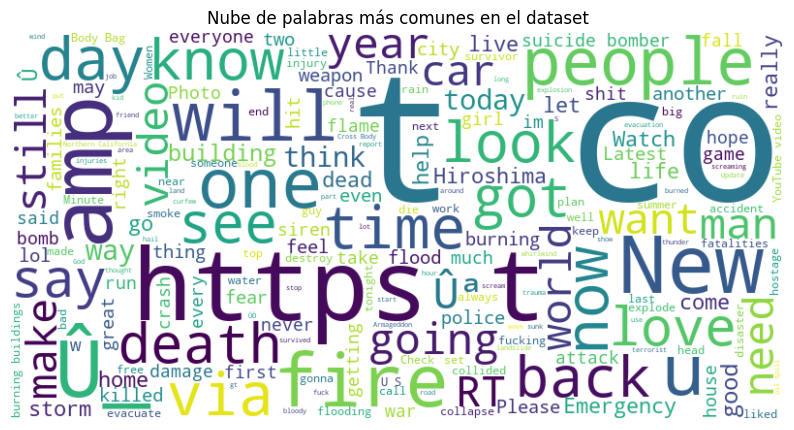

In [27]:
text_corpus = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras más comunes en el dataset')
plt.show()

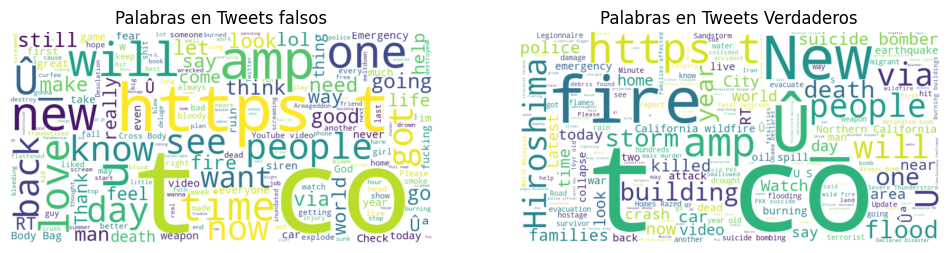

In [28]:
falso_textos = df[df['target'] == 0]['text']
real_textos = df[df['target'] == 1]['text']

# Word cloud for each target class
wordcloud0 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(falso_textos))
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(real_textos))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud0, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras en Tweets falsos')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras en Tweets Verdaderos')

plt.show()